In [1]:
import pandas as p
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

In [10]:
import io
uploaded = files.upload()
# Use the correct key 'lh (6).csv' to access the uploaded file
d = p.read_csv(io.BytesIO(uploaded[r'lh (8).csv'])) # Changed the key to 'lh (6).csv'
d.head()

Saving lh.csv to lh (8).csv


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [11]:
df=d.copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [13]:
df.isnull().sum()

,0
Address,0
Neighborhood,0
Bedrooms,0
Bathrooms,0
Square Meters,0
Building Age,0
Garden,0
Garage,0
Floors,0
Property Type,0


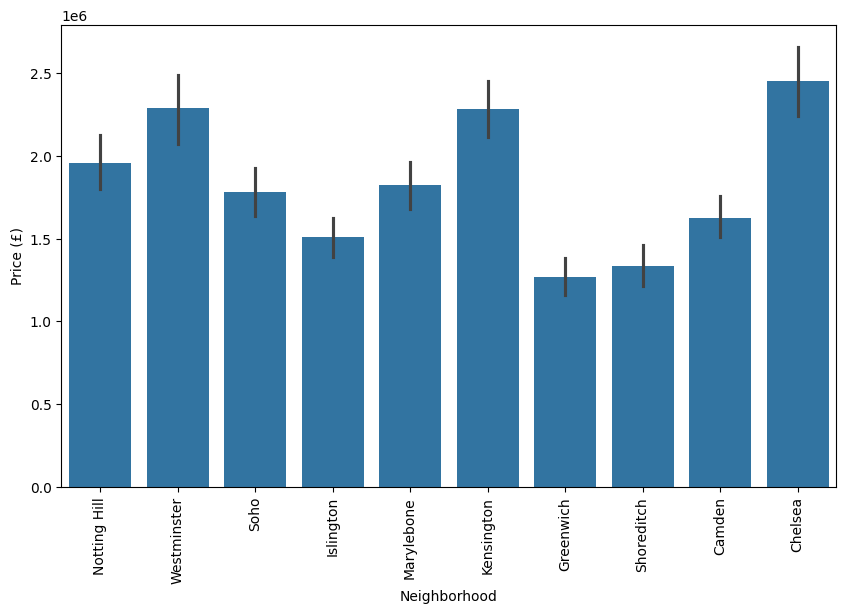

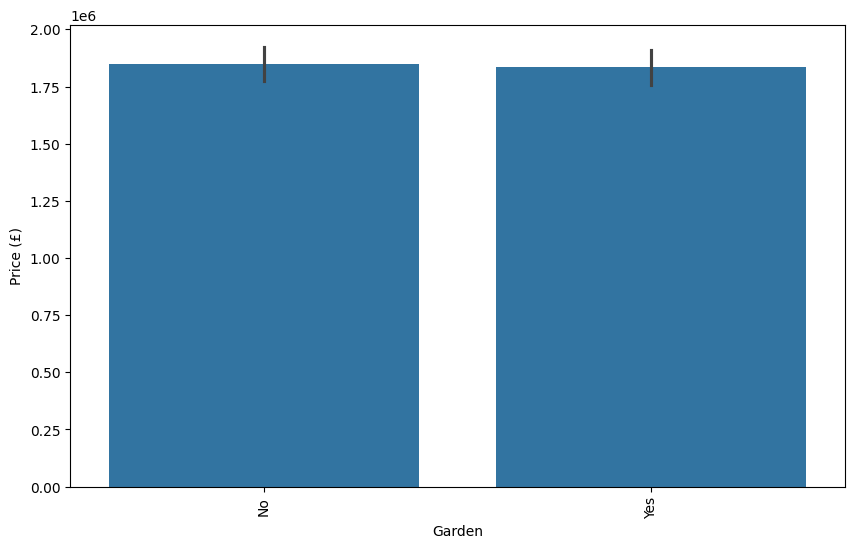

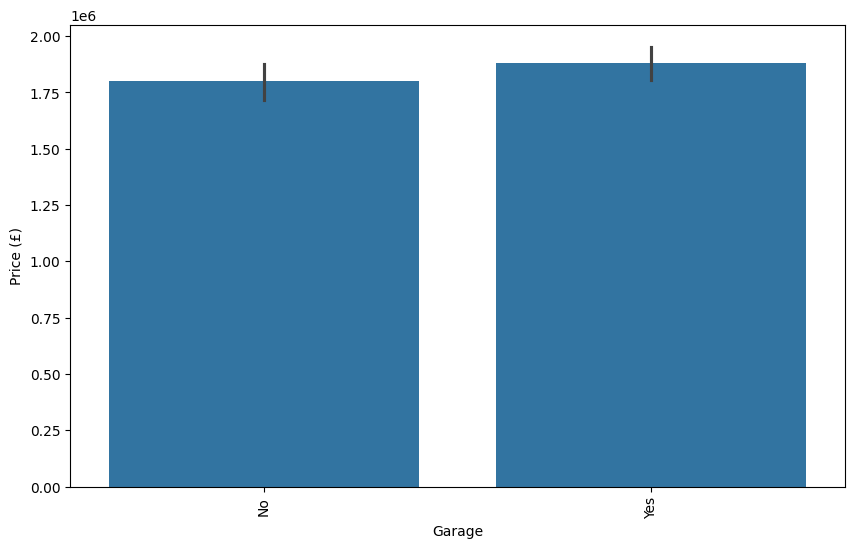

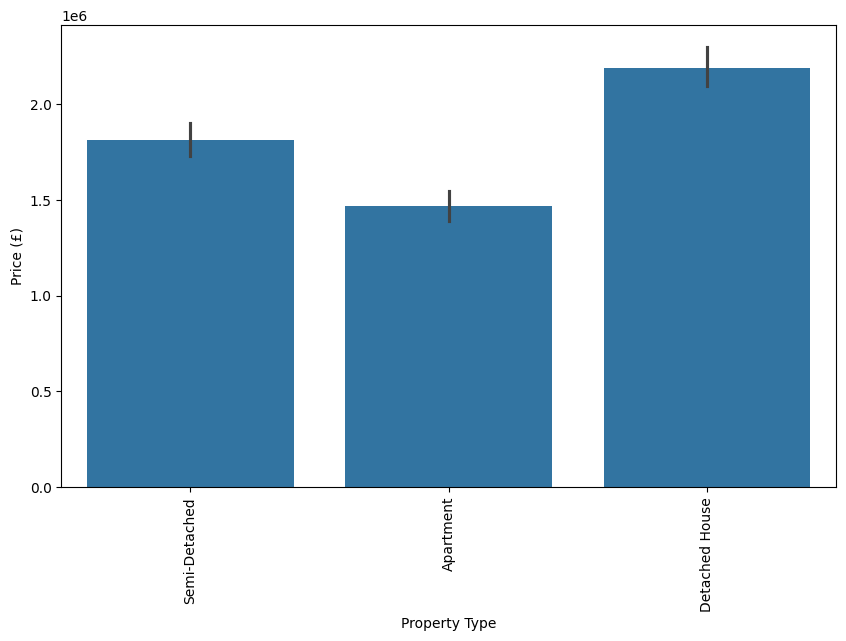

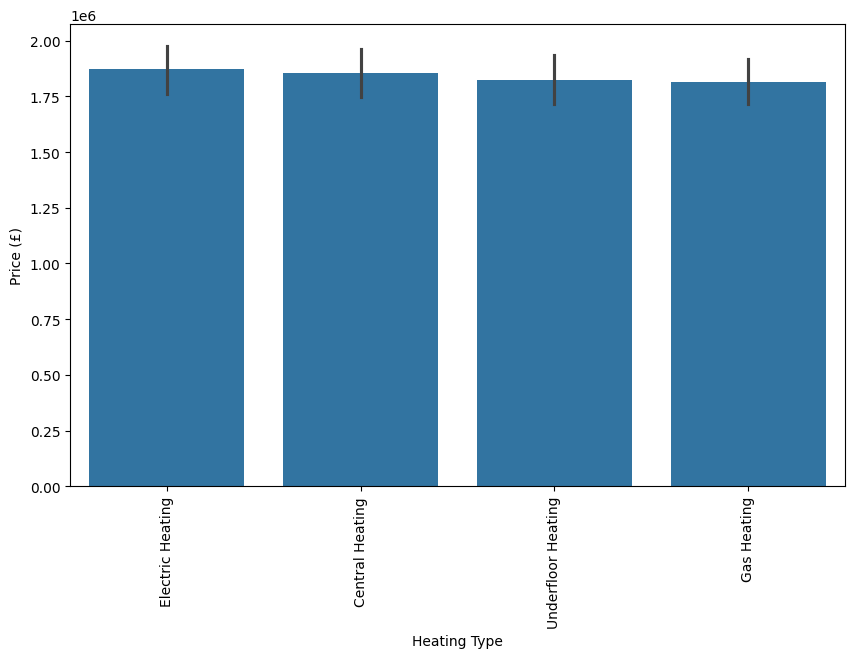

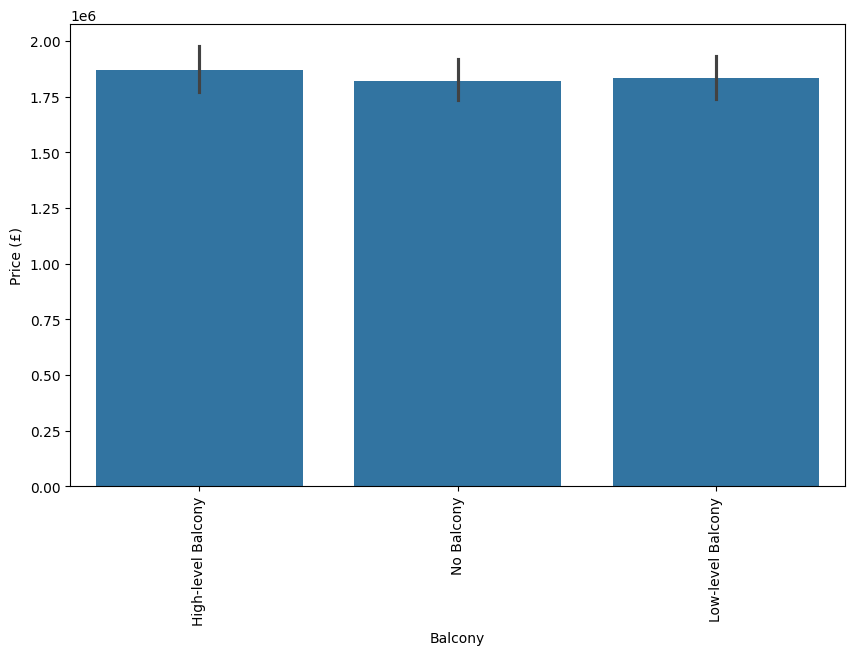

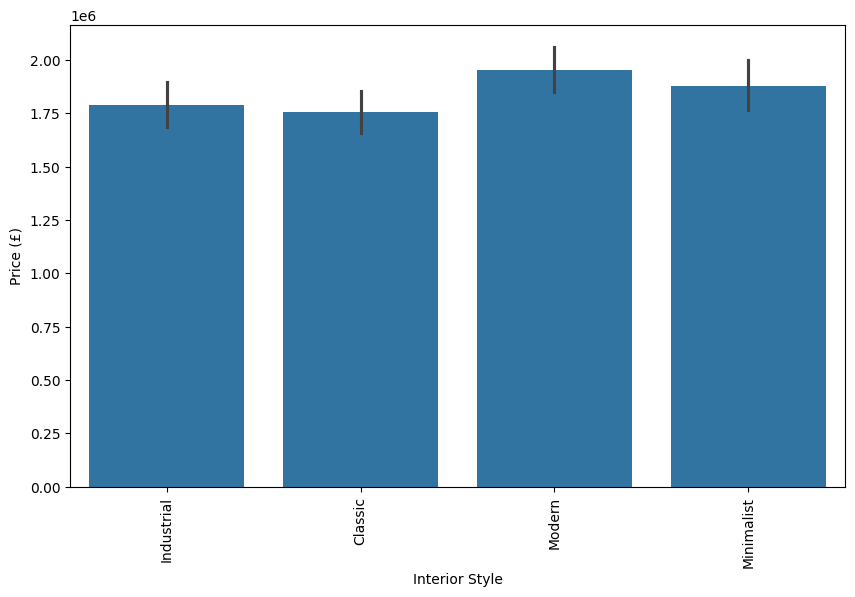

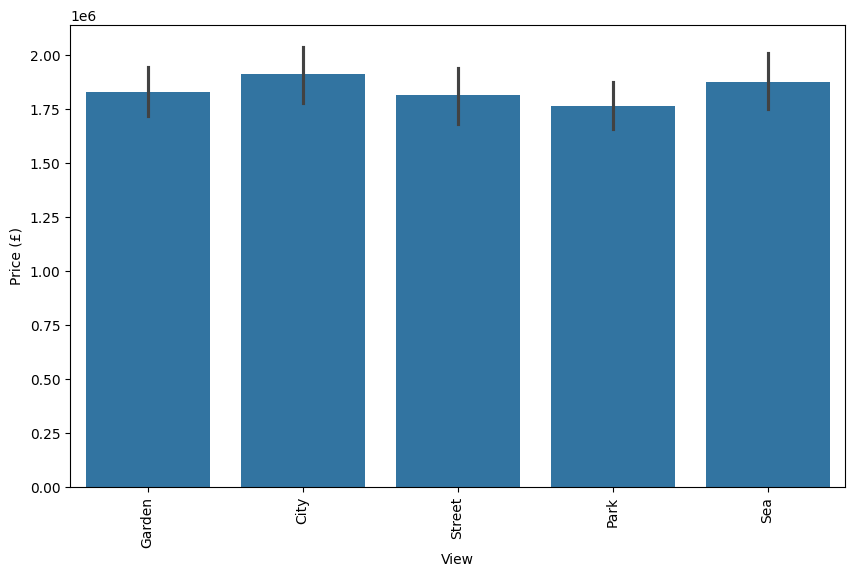

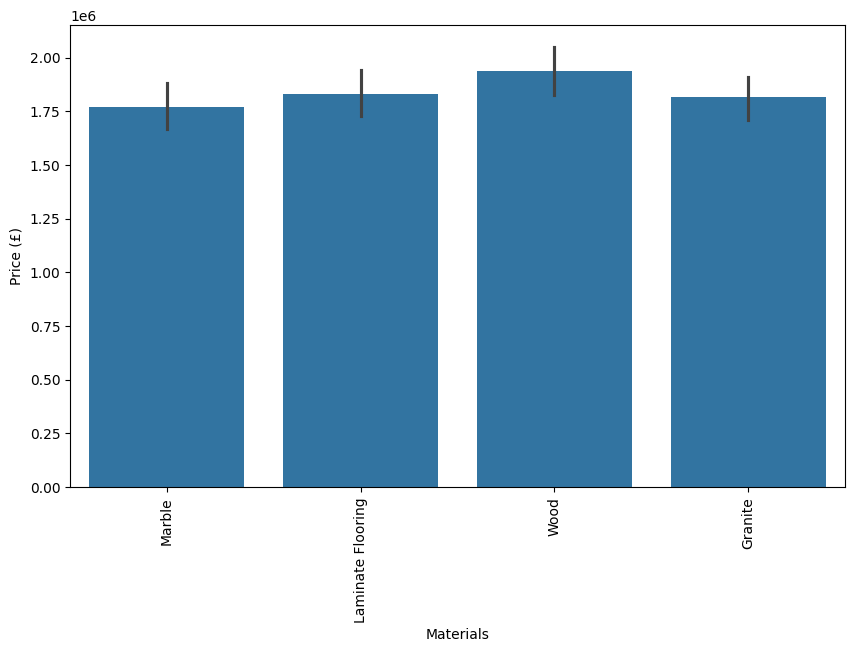

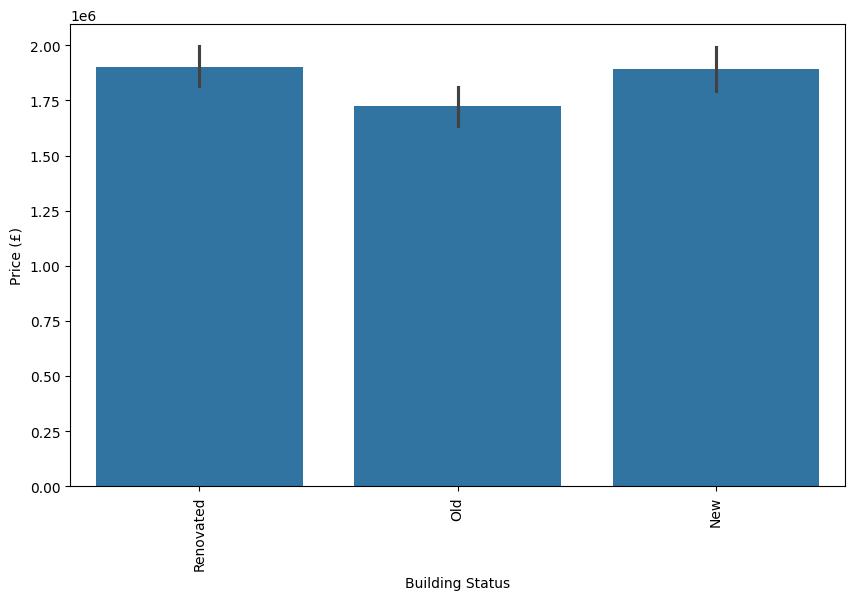

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    if (df[i].dtype=='object') and (i!='Address'):
        plt.figure(figsize=(10,6))
        sns.barplot(x=df[i],y=df['Price (£)'],data=df)
        plt.xticks(rotation=90)

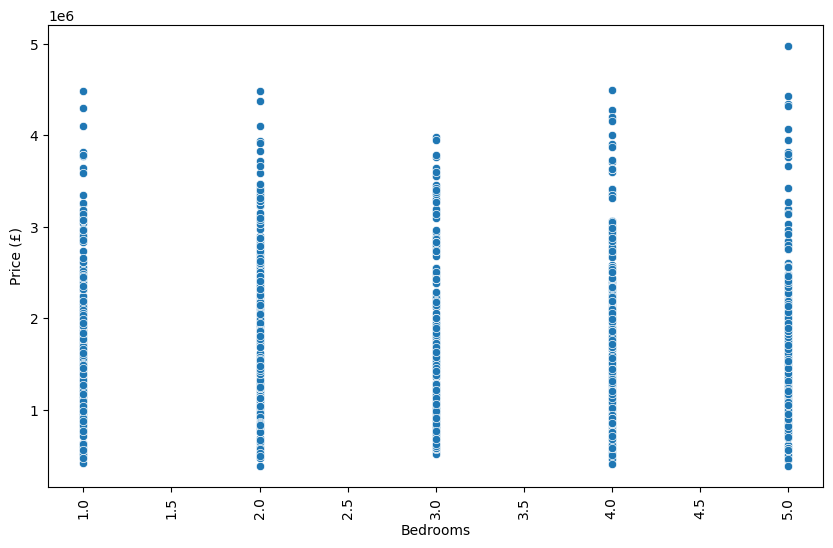

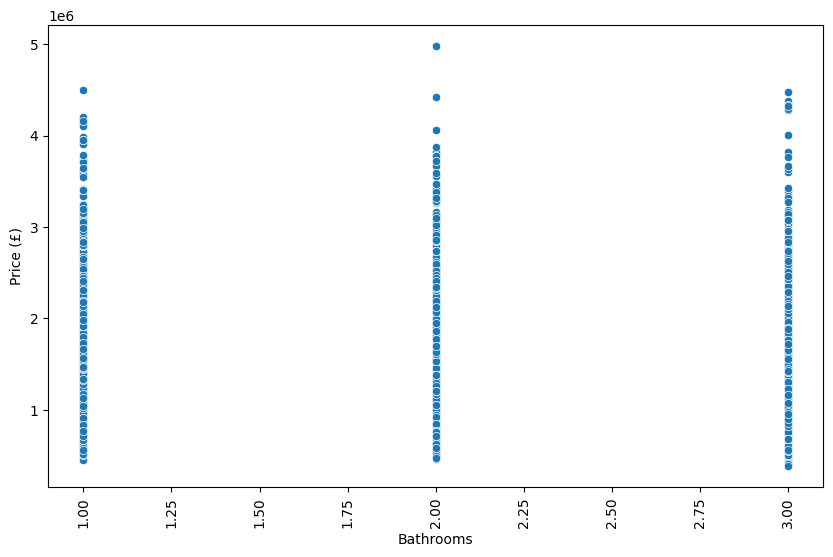

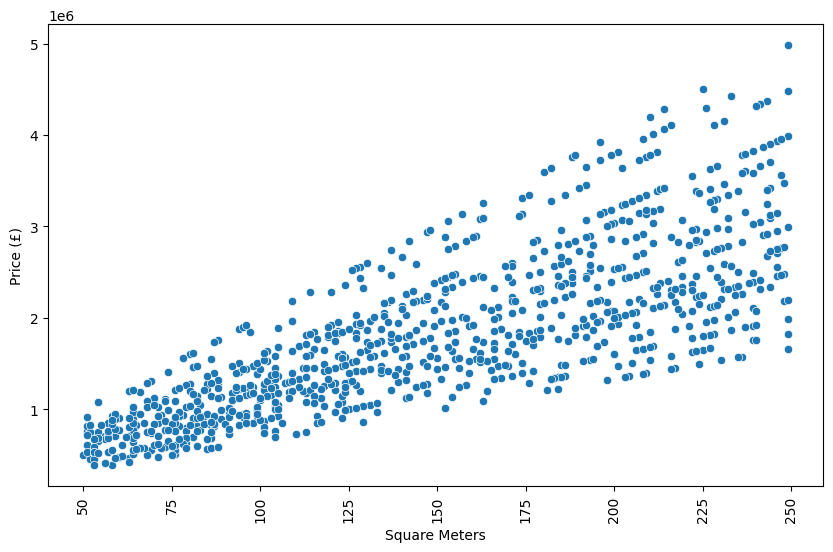

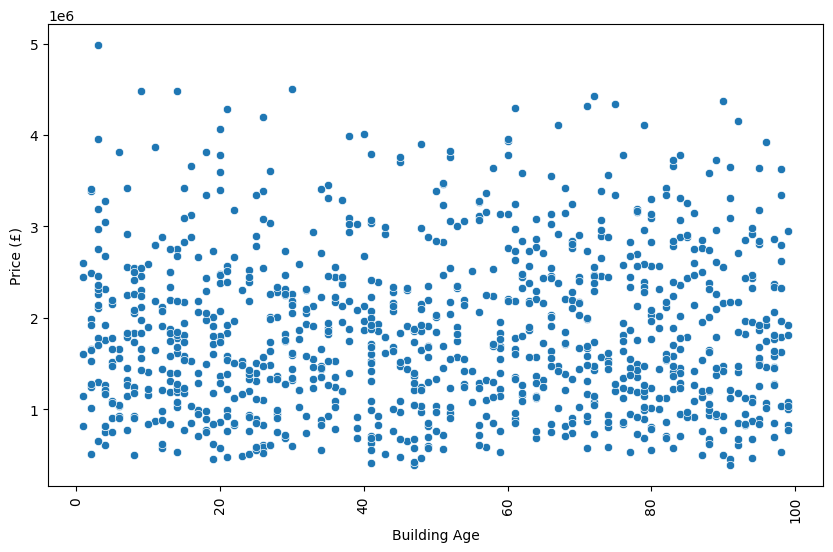

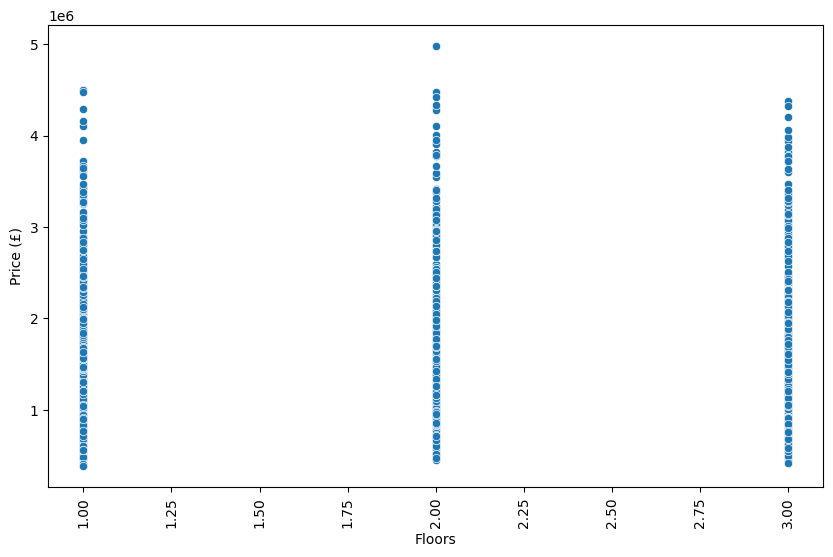

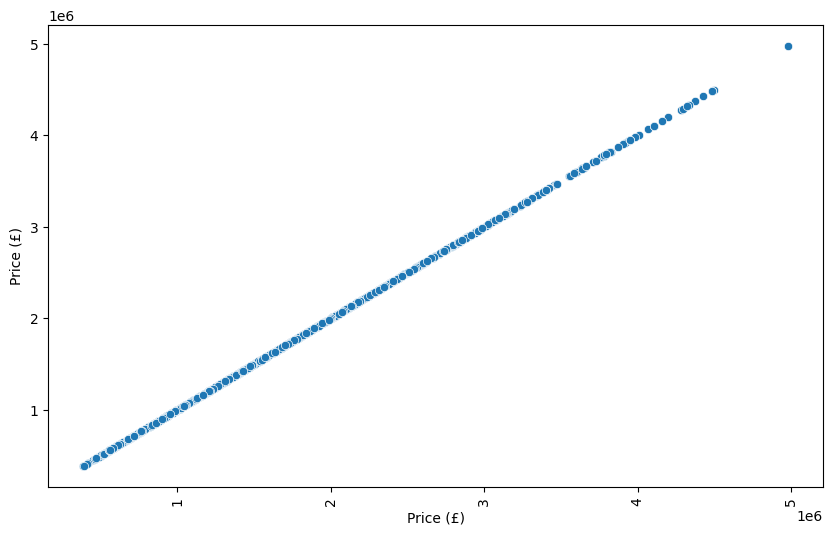

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    if (df[i].dtype!='object') and (i!='Address'):
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=df[i],y=df['Price (£)'],data=df)
        plt.xticks(rotation=90)

In [16]:
df.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (£)
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06


In [17]:
df.drop('Address',axis=1,inplace=True)

In [256]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# selecting the categorical columns
cat=df.select_dtypes(include=['object']).columns
# applying label encoder to each categorical columns
for col in cat:
  df[col]=le.fit_transform(df[col])

In [257]:
df=df.applymap(lambda x:int(x))

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Neighborhood     1000 non-null   int64
 1   Bedrooms         1000 non-null   int64
 2   Bathrooms        1000 non-null   int64
 3   Square Meters    1000 non-null   int64
 4   Building Age     1000 non-null   int64
 5   Garden           1000 non-null   int64
 6   Garage           1000 non-null   int64
 7   Floors           1000 non-null   int64
 8   Property Type    1000 non-null   int64
 9   Heating Type     1000 non-null   int64
 10  Balcony          1000 non-null   int64
 11  Interior Style   1000 non-null   int64
 12  View             1000 non-null   int64
 13  Materials        1000 non-null   int64
 14  Building Status  1000 non-null   int64
 15  Price (£)        1000 non-null   int64
dtypes: int64(16)
memory usage: 125.1 KB


In [261]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x=df.drop(['Price (£)'],axis=1)
y=df[['Price (£)']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [262]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [263]:
r2_score(y_test,y_pred)

0.7154317391196021

In [273]:
from sklearn.preprocessing import PolynomialFeatures

# Example of using Polynomial Regression:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model = LinearRegression().fit(x_train_poly, y_train)
r2_score(y_test,model.predict(x_test_poly))

0.7763540318553215

In [274]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2_score(y_test,y_pred)

0.8220809212841784

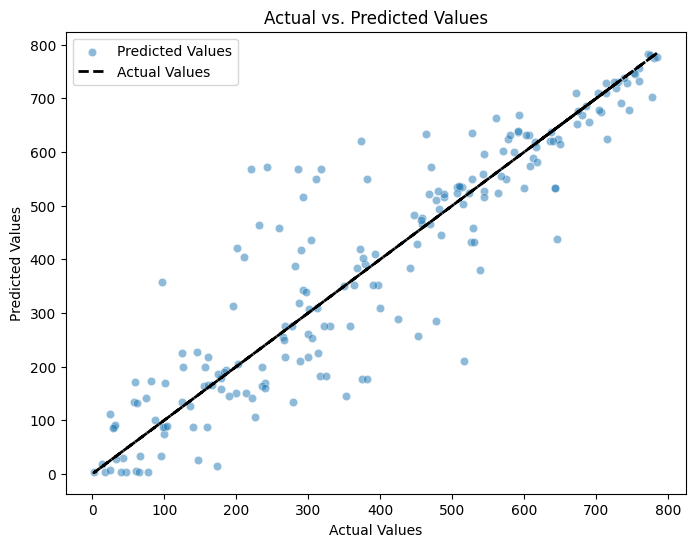

In [275]:
plt.figure(figsize=(8, 6))

# Plot predicted values with a label for the legend
sns.scatterplot(x=y_test['Price (£)'], y=y_pred, alpha=0.5, label='Predicted Values')

# Plot actual values (as a line) with a label for the legend
plt.plot(y_test['Price (£)'], y_test['Price (£)'], 'k--', lw=2, label='Actual Values')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add the legend
plt.legend()

plt.show()